### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.  

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

Importing the required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
plt.rcParams["figure.figsize"] = [20,10]

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the cars dataset

Import Country-data.csv dataset

In [4]:
country_data = pd.read_csv(r"D:\NC\Trail_DS\PCA & Clustering Assignment\Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
original_data = country_data.copy()

In [6]:
country_data.shape

(167, 10)

In [7]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
#count the number of null values in each column
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Since there are no null values, we do not need missing values treatment.

In [9]:
#Checking for duplicates
country_data.loc[country_data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Also, there are no duplicates.

## Step 2: Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2880x864 with 0 Axes>

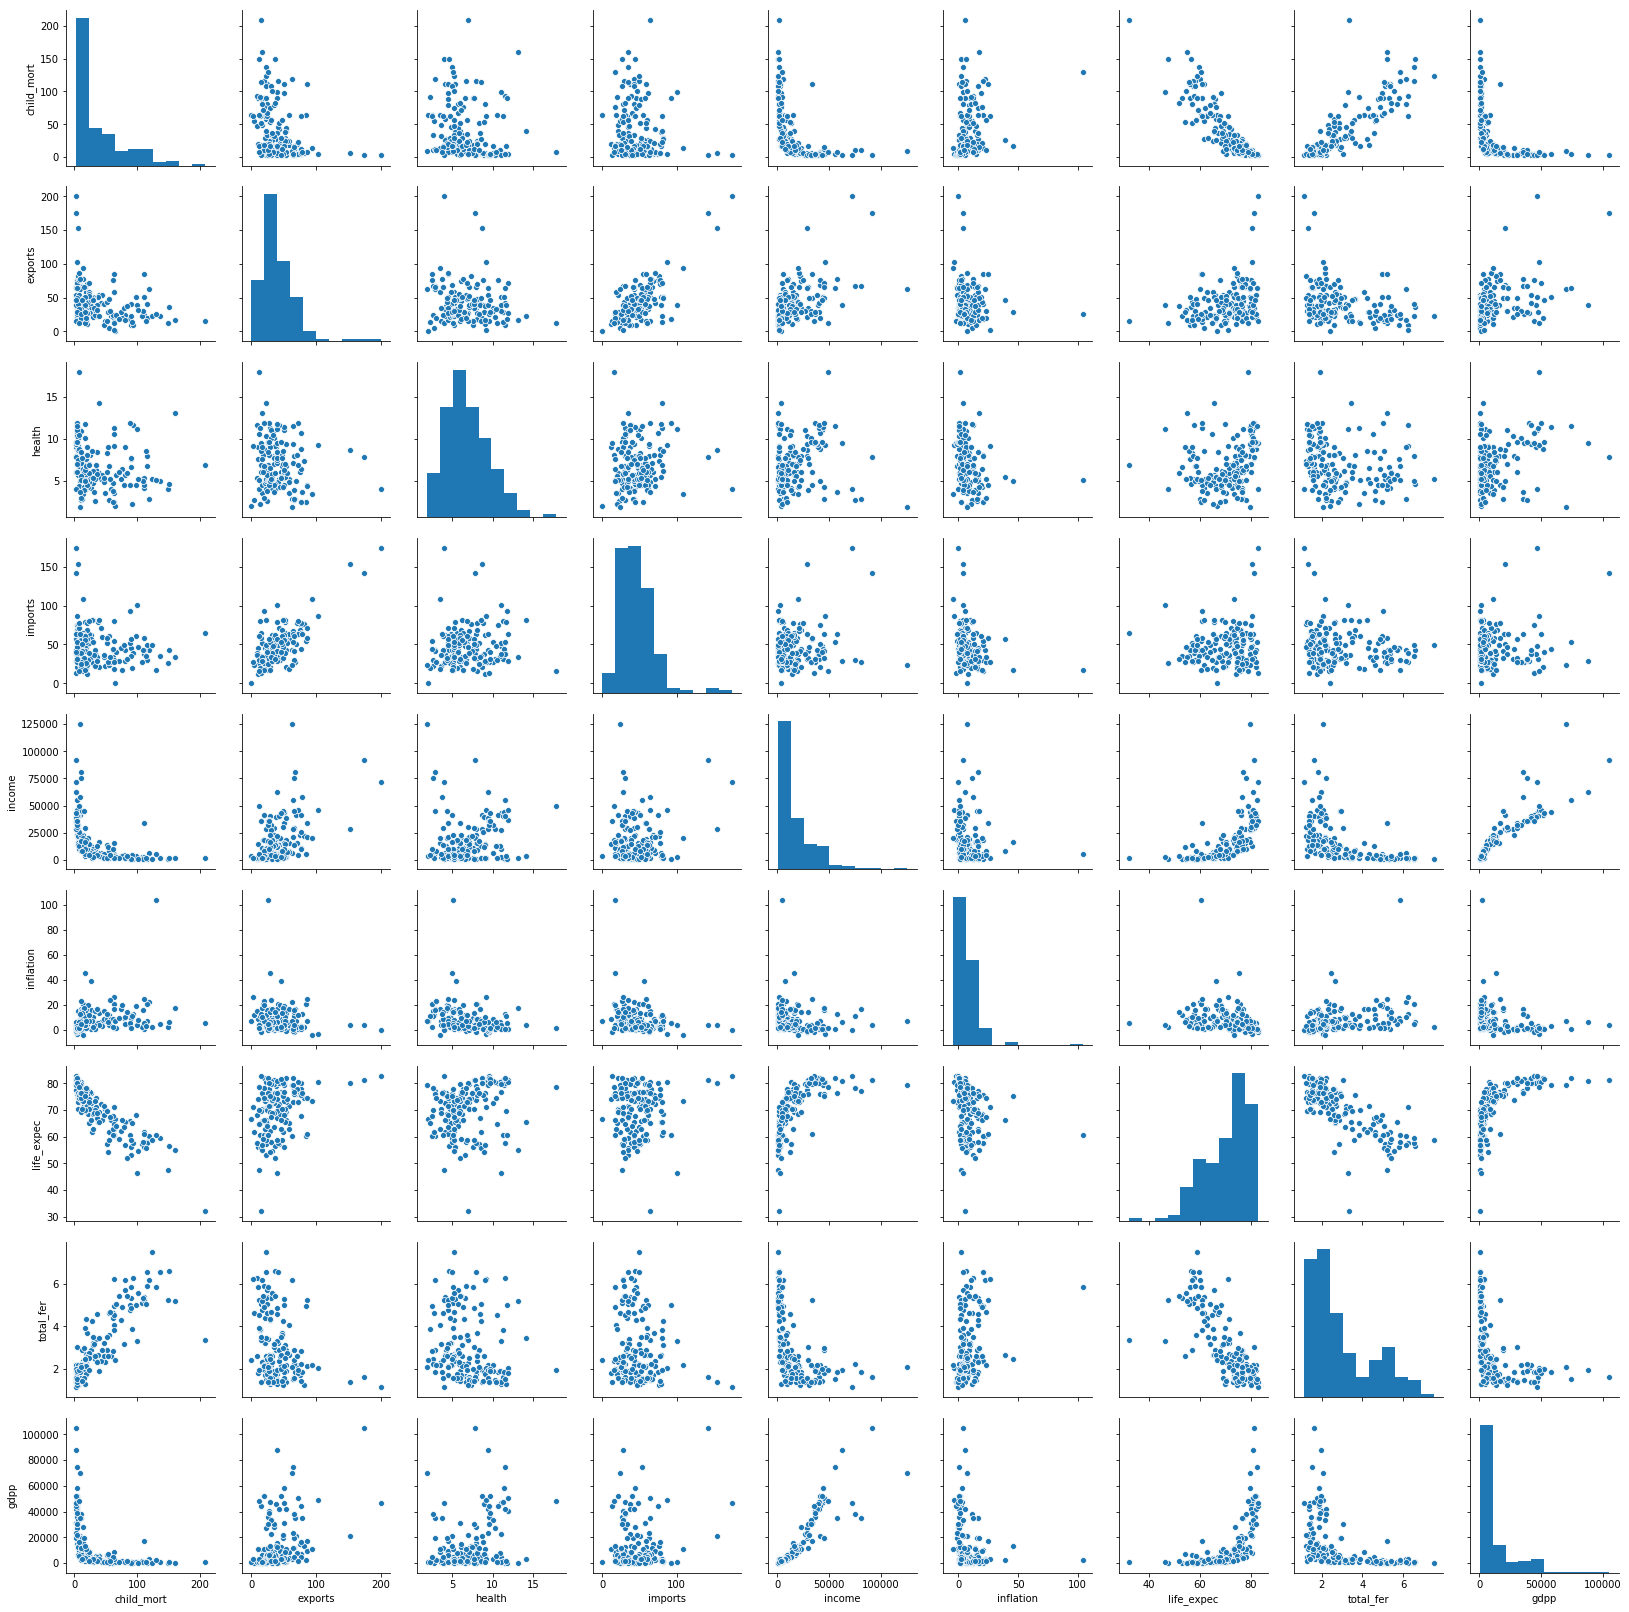

In [10]:
plt.figure(figsize=(40, 12))
sns.pairplot(country_data)
plt.show()

As observed, there is a positive correlation between:
 - child_mort and total_fer
 - income and gdpp
 - exports and imports
 - income and life_expec

and negative correlation between:
 - child_mort and life_expec
 - life_expec and total_fer 

This explains there is multicollinearity amongst other variables

In [11]:
correlationval = country_data.corr()
round(correlationval, 2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.00,-0.32,-0.20,-0.13,-0.52,0.29,-0.89,0.85,-0.48
exports,-0.32,1.00,-0.11,0.74,0.52,-0.11,0.32,-0.32,0.42
health,-0.20,-0.11,1.00,0.10,0.13,-0.26,0.21,-0.20,0.35
imports,-0.13,0.74,0.10,1.00,0.12,-0.25,0.05,-0.16,0.12
income,-0.52,0.52,0.13,0.12,1.00,-0.15,0.61,-0.50,0.90
inflation,0.29,-0.11,-0.26,-0.25,-0.15,1.00,-0.24,0.32,-0.22
life_expec,-0.89,0.32,0.21,0.05,0.61,-0.24,1.00,-0.76,0.60
total_fer,0.85,-0.32,-0.20,-0.16,-0.50,0.32,-0.76,1.00,-0.45
gdpp,-0.48,0.42,0.35,0.12,0.90,-0.22,0.60,-0.45,1.00


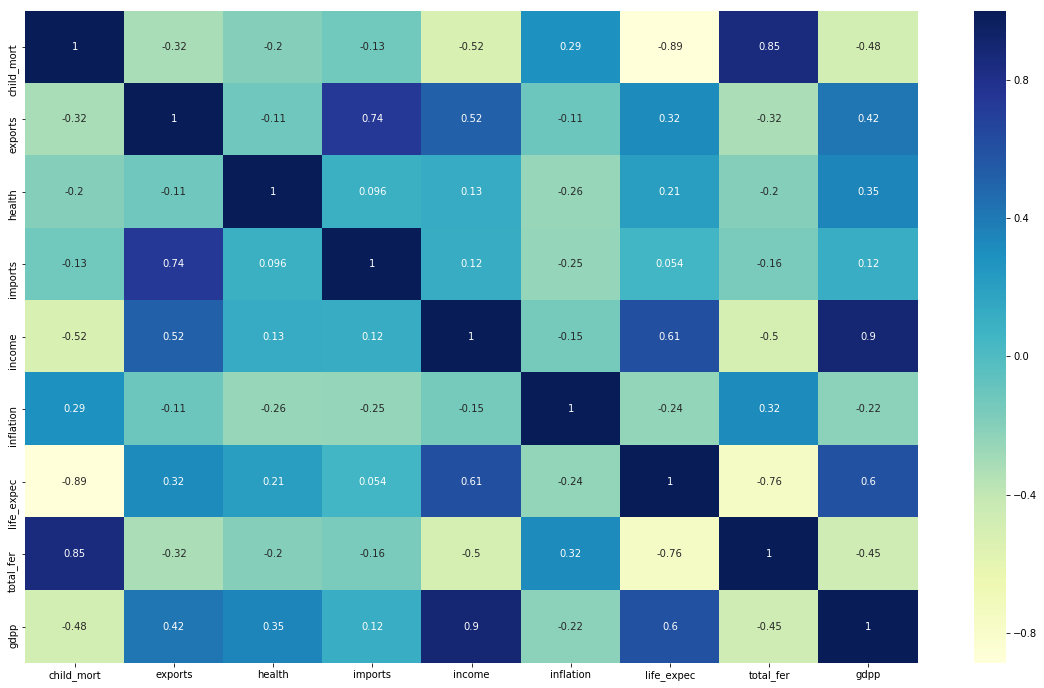

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlationval, cmap="YlGnBu", annot=True)
plt.show()

#### Outlier Analysis

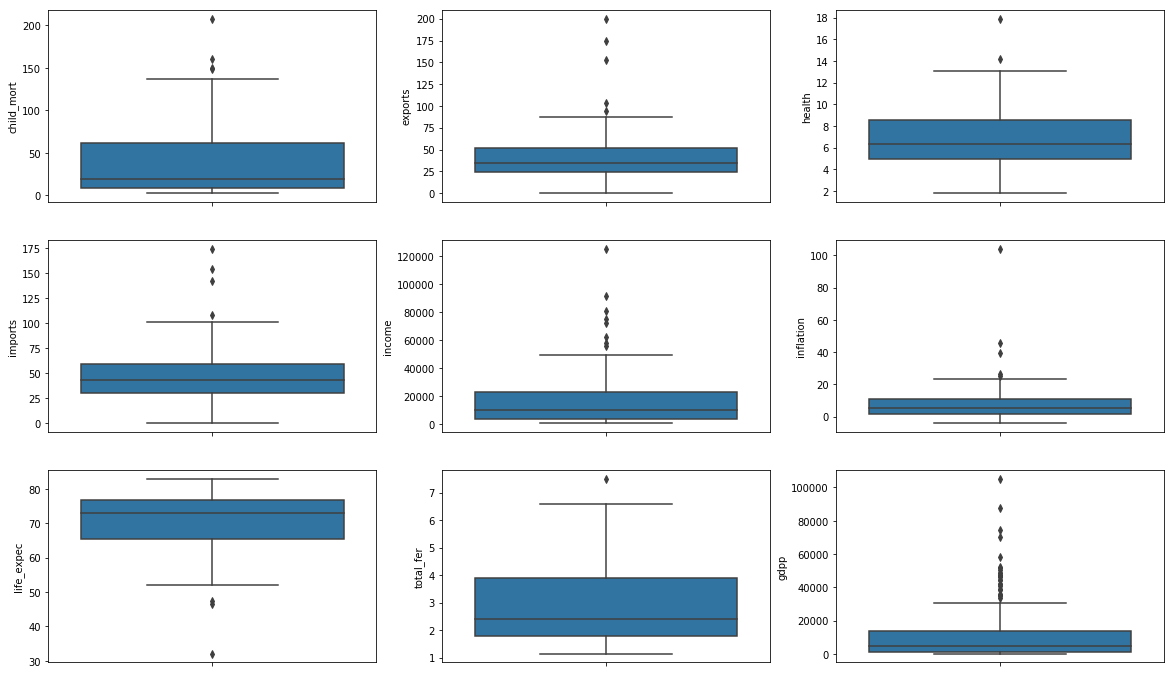

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = country_data)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = country_data)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = country_data)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = country_data)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = country_data)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = country_data)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = country_data)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = country_data)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = country_data)
plt.show()

The above plots show that there are outliers present in some columns. 

In [14]:
# removing (statistical) outliers by capping values
Q1 = country_data.child_mort.quantile(0.05)
Q3 = country_data.child_mort.quantile(0.95)
country_data['child_mort'][country_data['child_mort'] <= Q1] = Q1
country_data['child_mort'][country_data['child_mort'] >= Q3] = Q3

Q1 = country_data.exports.quantile(0.05)
Q3 = country_data.exports.quantile(0.95)
country_data['exports'][country_data['exports'] <= Q1] = Q1
country_data['exports'][country_data['exports'] >= Q3] = Q3

Q1 = country_data.health.quantile(0.05)
Q3 = country_data.health.quantile(0.95)
country_data['health'][country_data['health'] <= Q1] = Q1
country_data['health'][country_data['health'] >= Q3] = Q3

Q1 = country_data.imports.quantile(0.05)
Q3 = country_data.imports.quantile(0.95)
country_data['imports'][country_data['imports'] <= Q1] = Q1
country_data['imports'][country_data['imports'] >= Q3] = Q3

Q1 = country_data.income.quantile(0.05)
Q3 = country_data.income.quantile(0.95)
country_data['income'][country_data['income'] <= Q1] = Q1
country_data['income'][country_data['income'] >= Q3] = Q3

Q1 = country_data.inflation.quantile(0.05)
Q3 = country_data.inflation.quantile(0.95)
country_data['inflation'][country_data['inflation'] <= Q1] = Q1
country_data['inflation'][country_data['inflation'] >= Q3] = Q3

Q1 = country_data.life_expec.quantile(0.05)
Q3 = country_data.life_expec.quantile(0.95)
country_data['life_expec'][country_data['life_expec'] <= Q1] = Q1
country_data['life_expec'][country_data['life_expec'] >= Q3] = Q3

Q1 = country_data.total_fer.quantile(0.05)
Q3 = country_data.total_fer.quantile(0.95)
country_data['total_fer'][country_data['total_fer'] <= Q1] = Q1
country_data['total_fer'][country_data['total_fer'] >= Q3] = Q3

Q1 = country_data.gdpp.quantile(0.05)
Q3 = country_data.gdpp.quantile(0.95)
country_data['gdpp'][country_data['gdpp'] <= Q1] = Q1
country_data['gdpp'][country_data['gdpp'] >= Q3] = Q3

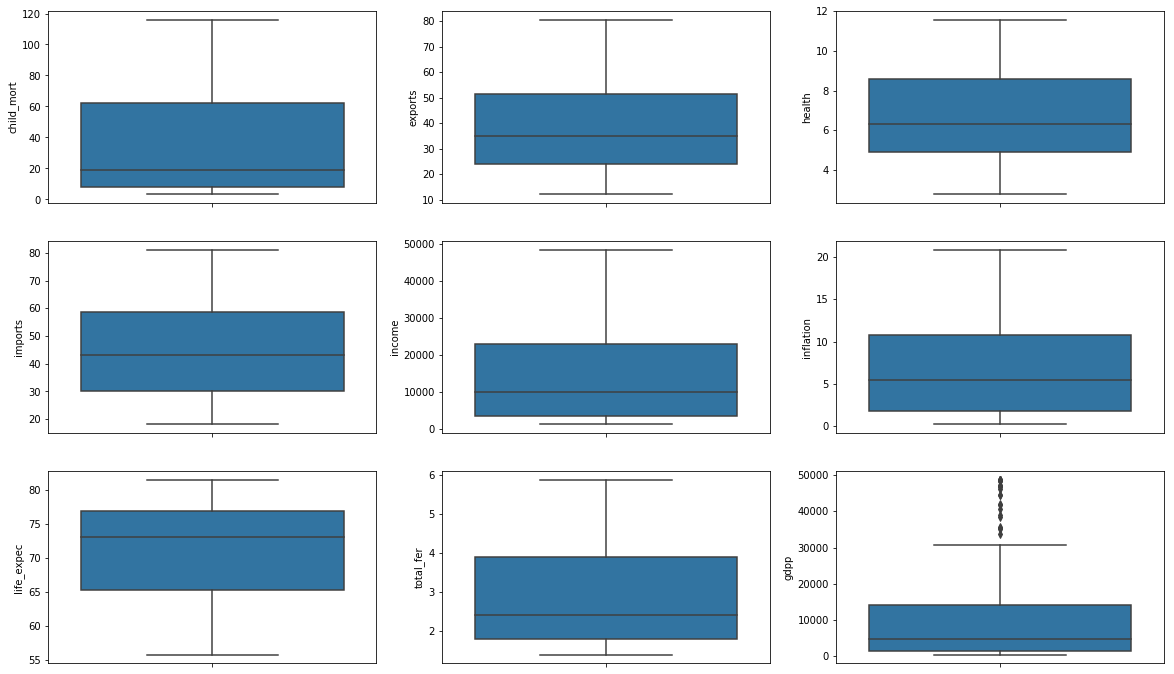

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = country_data)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = country_data)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = country_data)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = country_data)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = country_data)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = country_data)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = country_data)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = country_data)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = country_data)
plt.show()

## Step 3: PCA

In [16]:
y = country_data.pop("country")

Scaling the data

In [17]:
scaler = StandardScaler()

In [18]:
X = country_data.copy()

In [19]:
X.shape

(167, 9)

In [20]:
x = scaler.fit_transform(X)

### Applying PCA on the data

In [21]:
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [24]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

<BarContainer object of 9 artists>

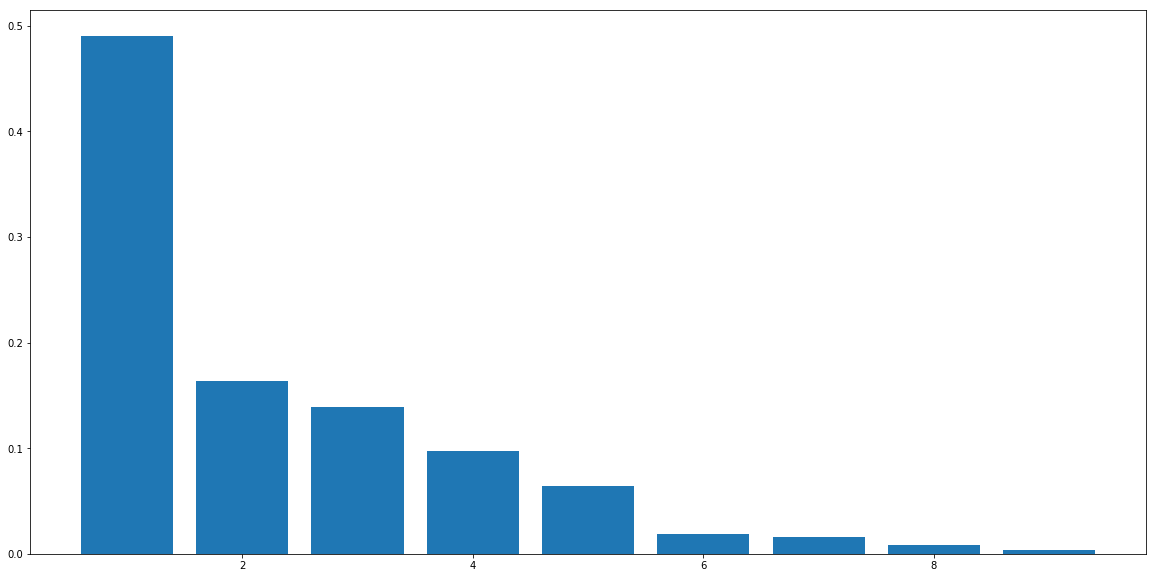

In [25]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [26]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

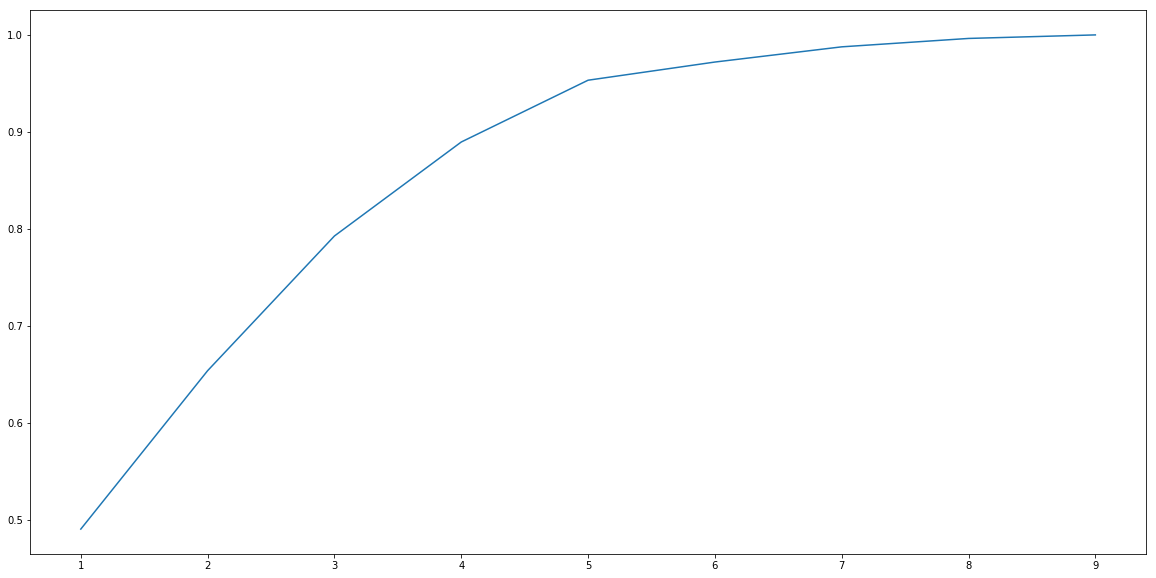

In [27]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 5 components explains 95% of variance.

In [28]:
pc2 = PCA(n_components=5, random_state=42)

In [29]:
newdata = pc2.fit_transform(x)

In [30]:
newdata.shape

(167, 5)

Making a dataframe out of it for convenience

In [31]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.276710,0.384825,-1.061693,0.915760,0.055815
1,0.482592,0.138345,-0.315498,-1.429981,0.101463
2,-0.447438,0.492021,1.777013,-0.669628,0.517964
3,-3.356983,-1.158613,2.059427,1.732923,0.080301
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204


In [32]:
df_final = pd.concat([df, y], axis=1)

In [33]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-3.276710,0.384825,-1.061693,0.915760,0.055815,Afghanistan
1,0.482592,0.138345,-0.315498,-1.429981,0.101463,Albania
2,-0.447438,0.492021,1.777013,-0.669628,0.517964,Algeria
3,-3.356983,-1.158613,2.059427,1.732923,0.080301,Angola
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204,Antigua and Barbuda


In [34]:
df_final.shape

(167, 6)

## Step 4: Clustering

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df)

0.7177364738384567

High tendency to cluster.

#### K - Means

In [37]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([2, 0, 3, 2, 0, 3, 3, 1, 1, 3, 1, 1, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2,
       3, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 3, 3, 3, 0, 2, 2, 0, 0, 1, 1, 3, 2, 0, 1, 2, 1, 0, 3, 2, 2, 0,
       2, 0, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 3, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3,
       1, 1, 2, 2, 1, 3, 2, 0, 0, 3, 3, 0, 1, 1, 0, 3, 2, 0, 3, 2, 0, 0,
       2, 1, 0, 1, 0, 2, 1, 1, 3, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 3, 0, 3, 0, 2, 2])

## Finding the Optimal Number of Clusters

### SSD

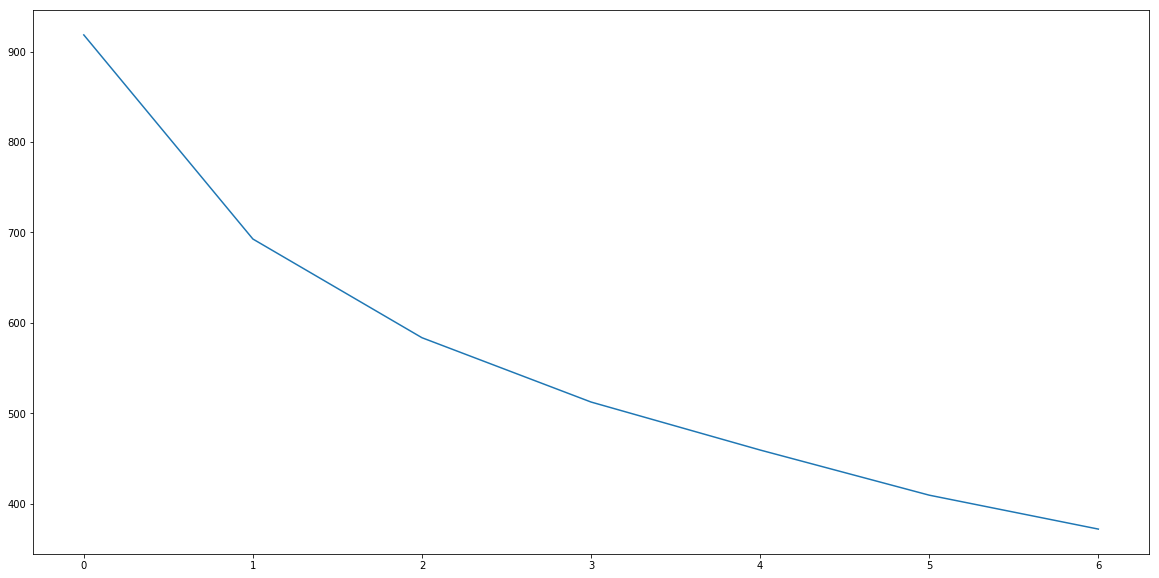

In [39]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [40]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.30326948425930467
For n_clusters=3, the silhouette score is 0.2930625783649584
For n_clusters=4, the silhouette score is 0.27400822516463613
For n_clusters=5, the silhouette score is 0.27454779606204743
For n_clusters=6, the silhouette score is 0.26801699087770126
For n_clusters=7, the silhouette score is 0.25441464940926994
For n_clusters=8, the silhouette score is 0.2832574691032169


In [41]:
# final model with k=3 as it has a better silhoutte score and ssd
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [43]:
# assign the label
df_final['cluster_labels_kmeans'] = kmeans.labels_
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_labels_kmeans
0,-3.276710,0.384825,-1.061693,0.915760,0.055815,Afghanistan,1
1,0.482592,0.138345,-0.315498,-1.429981,0.101463,Albania,0
2,-0.447438,0.492021,1.777013,-0.669628,0.517964,Algeria,0
3,-3.356983,-1.158613,2.059427,1.732923,0.080301,Angola,1
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204,Antigua and Barbuda,0


## Hierarchical Clustering

In [44]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.276710,0.384825,-1.061693,0.915760,0.055815
1,0.482592,0.138345,-0.315498,-1.429981,0.101463
2,-0.447438,0.492021,1.777013,-0.669628,0.517964
3,-3.356983,-1.158613,2.059427,1.732923,0.080301
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204


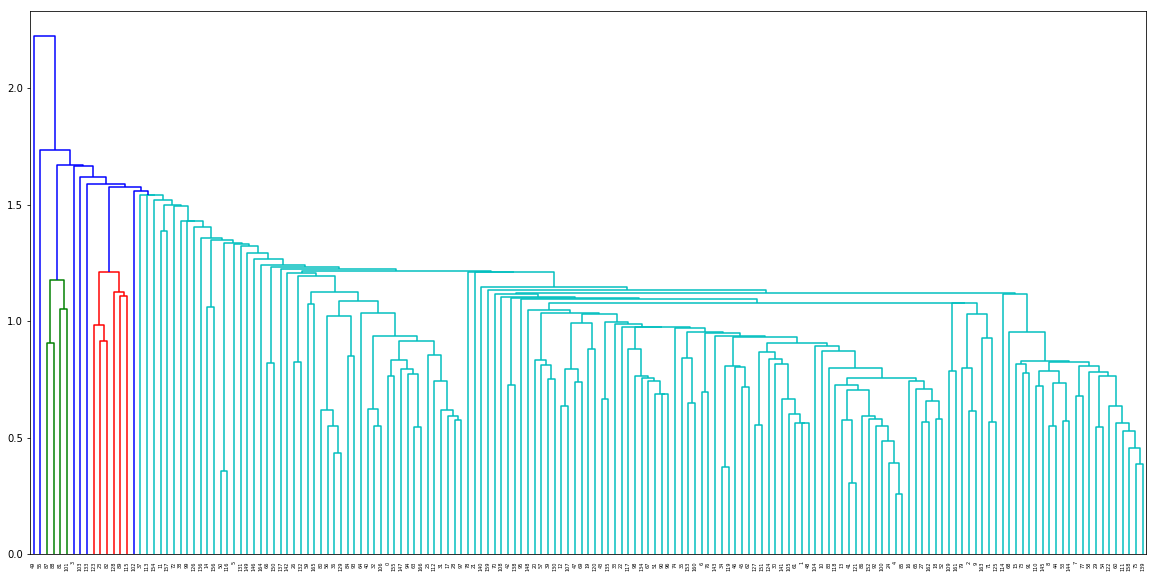

In [45]:
# single linkage
mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

As observed above single linkage does not form proper clusters.

In [46]:
# 2 clusters
cluster_labels_single = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels
df_final['cluster_labels_single'] = cluster_labels_single
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_labels_kmeans,cluster_labels_single
0,-3.276710,0.384825,-1.061693,0.915760,0.055815,Afghanistan,1,0
1,0.482592,0.138345,-0.315498,-1.429981,0.101463,Albania,0,0
2,-0.447438,0.492021,1.777013,-0.669628,0.517964,Algeria,0,0
3,-3.356983,-1.158613,2.059427,1.732923,0.080301,Angola,1,0
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204,Antigua and Barbuda,0,0


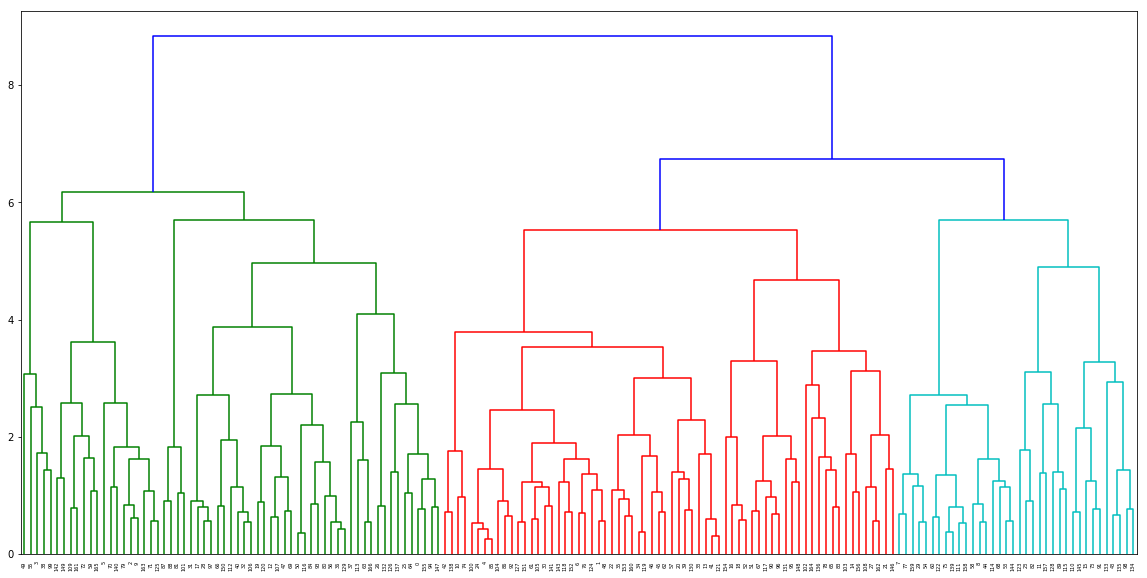

In [48]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0])

In [50]:
# assign cluster labels
df_final['cluster_labels_complete'] = cluster_labels
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_labels_kmeans,cluster_labels_single,cluster_labels_complete
0,-3.276710,0.384825,-1.061693,0.915760,0.055815,Afghanistan,1,0,0
1,0.482592,0.138345,-0.315498,-1.429981,0.101463,Albania,0,0,1
2,-0.447438,0.492021,1.777013,-0.669628,0.517964,Algeria,0,0,0
3,-3.356983,-1.158613,2.059427,1.732923,0.080301,Angola,1,0,0
4,1.244934,-0.702870,-0.223665,-0.743702,-0.444204,Antigua and Barbuda,0,0,1


## Step 5: Visualising the clusters

In [51]:
result = pd.merge(original_data, df_final, how='inner', on=['country', 'country'])
result.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_labels_kmeans,cluster_labels_single,cluster_labels_complete
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-3.276710,0.384825,-1.061693,0.915760,0.055815,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.482592,0.138345,-0.315498,-1.429981,0.101463,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.447438,0.492021,1.777013,-0.669628,0.517964,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-3.356983,-1.158613,2.059427,1.732923,0.080301,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.244934,-0.702870,-0.223665,-0.743702,-0.444204,0,0,1


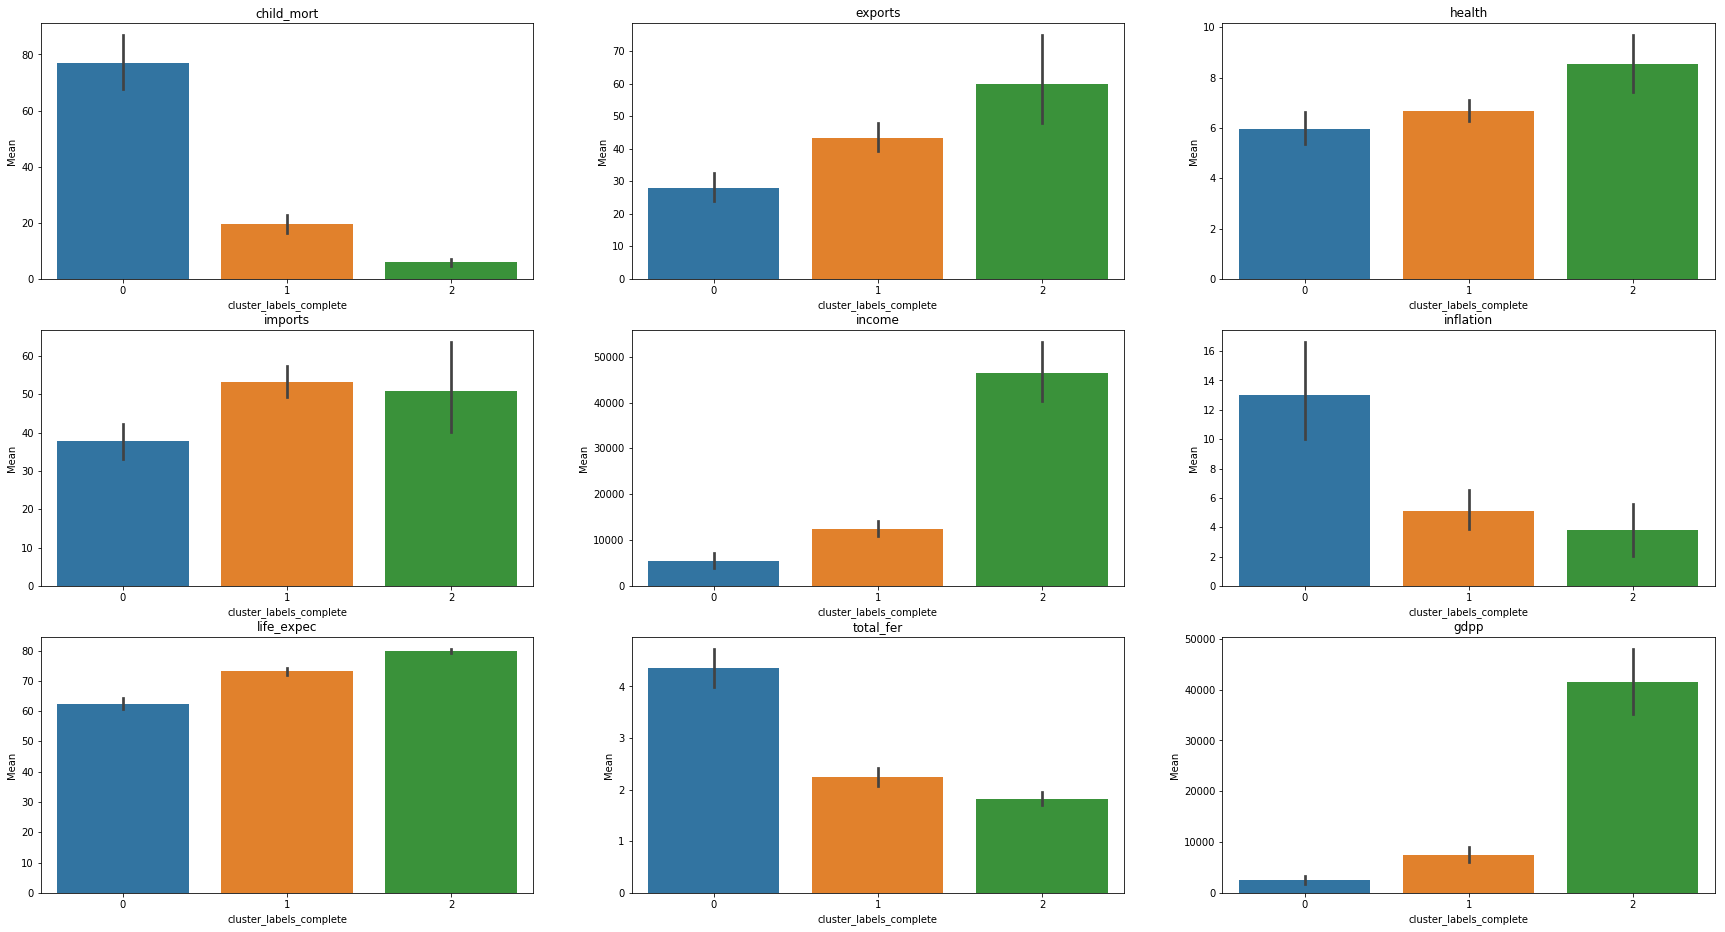

In [52]:
#visualise the mean distribution across clusters
plt.figure(figsize=(30, 16))

plt.subplot(3,3,1)
sns.barplot(x='cluster_labels_complete', y='child_mort', data=result, estimator=np.mean)
plt.title('child_mort')
plt.ylabel('Mean')

plt.subplot(3,3,2)
sns.barplot(x='cluster_labels_complete', y='exports', data=result, estimator=np.mean)
plt.title('exports')
plt.ylabel('Mean')

plt.subplot(3,3,3)
sns.barplot(x='cluster_labels_complete', y='health', data=result, estimator=np.mean)
plt.title('health')
plt.ylabel('Mean')

plt.subplot(3,3,4)
sns.barplot(x='cluster_labels_complete', y='imports', data=result, estimator=np.mean)
plt.title('imports')
plt.ylabel('Mean')

plt.subplot(3,3,5)
sns.barplot(x='cluster_labels_complete', y='income', data=result, estimator=np.mean)
plt.title('income')
plt.ylabel('Mean')

plt.subplot(3,3,6)
sns.barplot(x='cluster_labels_complete', y='inflation', data=result, estimator=np.mean)
plt.title('inflation')
plt.ylabel('Mean')

plt.subplot(3,3,7)
sns.barplot(x='cluster_labels_complete', y='life_expec', data=result, estimator=np.mean)
plt.title('life_expec')
plt.ylabel('Mean')

plt.subplot(3,3,8)
sns.barplot(x='cluster_labels_complete', y='total_fer', data=result, estimator=np.mean)
plt.title('total_fer')
plt.ylabel('Mean')

plt.subplot(3,3,9)
sns.barplot(x='cluster_labels_complete', y='gdpp', data=result, estimator=np.mean)
plt.title('gdpp')
plt.ylabel('Mean')

plt.show()

As observed from the above plots
    - Cluster 0 has high child mortality while Cluster 2 has the lowest.
    - Cluster 0 has low exports while Cluster 2 has the highest.
    - Cluster 0 has low health spending. Although there is not much difference in the health spending for all clusters.
    - Cluster 0 has low imports. Although there is not much difference in the imports for all the clusters.
    - Cluster 0 has low income while Cluster 2 has the highest.
    - Inflation is high for Cluster 0 while Cluster 2 has the lowest.
    - Cluster 0 has low life expectency. Although there is not much difference in the life expectency for all clusters.
    - Cluster 0 has high total fertilization.
    - Cluster 0 has lowest gdpp while Cluster 2 has the highest.
    
Cluster 0 has high child mortality, low income and high gdpp. Cluster 0 has the under developed countries. Cluster 1 has the developing countries while Cluster 2 has developed countries.

D:\NC\Training_Py\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


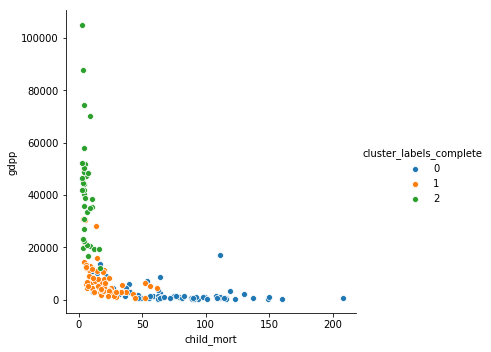

In [53]:
sns.pairplot(data=result, x_vars=["child_mort"], y_vars=["gdpp"], hue = "cluster_labels_complete", size=5)

As observed Cluster 0 has high child mortality and low gdpp. Cluster 2 has high gdpp and low child mortality.

D:\NC\Training_Py\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


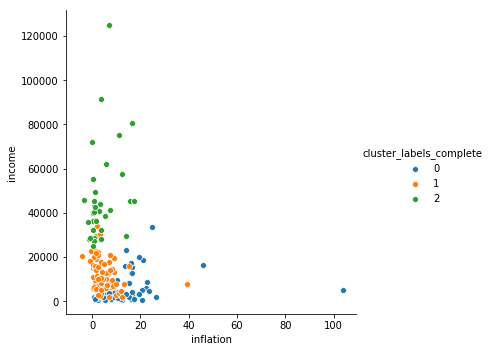

In [54]:
sns.pairplot(data=result, x_vars=["inflation"], y_vars=["income"], hue = "cluster_labels_complete", size=5)

As observed Cluster 0 has high inflation and low income. Cluster 2 has high income and low inflation.

D:\NC\Training_Py\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


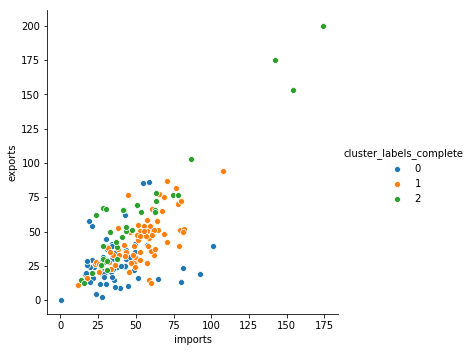

In [55]:
sns.pairplot(data=result, x_vars=["imports"], y_vars=["exports"], hue = "cluster_labels_complete", size=5)

As observed Cluster 0 has low imports and exports.

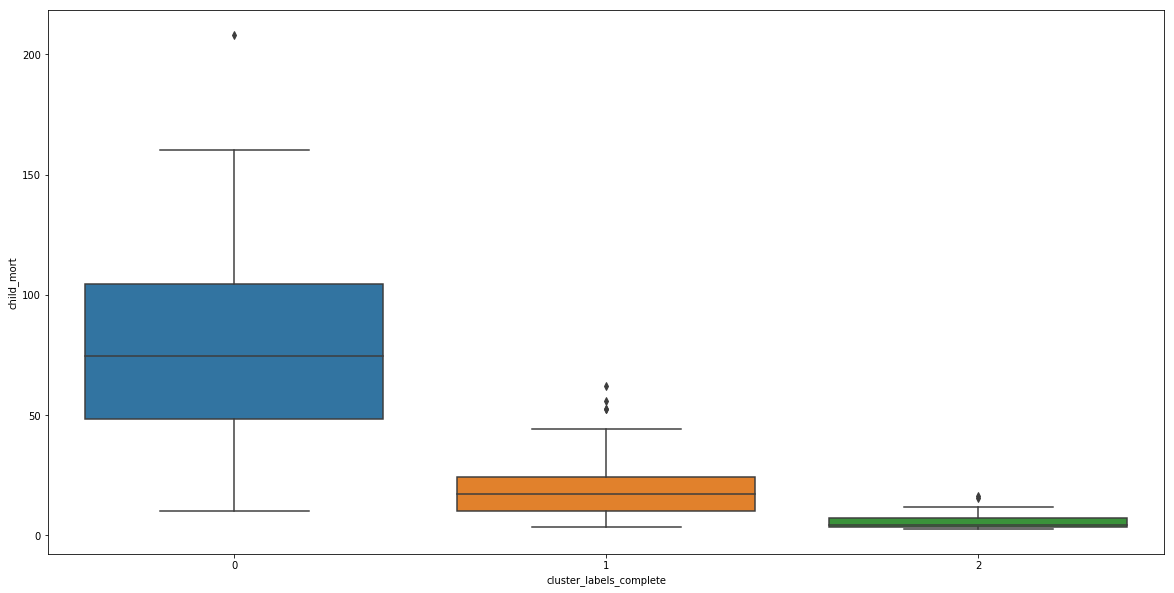

In [56]:
sns.boxplot(x= 'cluster_labels_complete', y = 'child_mort', data = result)

As observed the child mortality varies largely for Cluster 0 while it is quite low for Cluster 1 and Cluster 2.

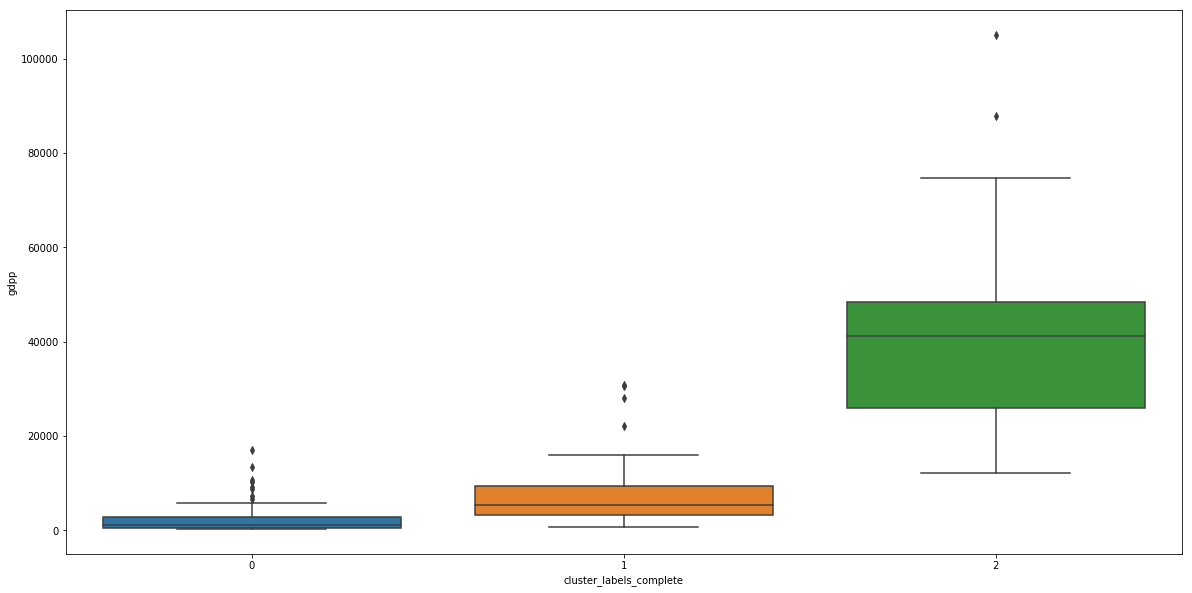

In [57]:
sns.boxplot(x= 'cluster_labels_complete', y = 'gdpp', data = result)

As observed the gdpp varies largely for Cluster 2 while it is quite low for Cluster 0 and Cluster 1.

D:\NC\Training_Py\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


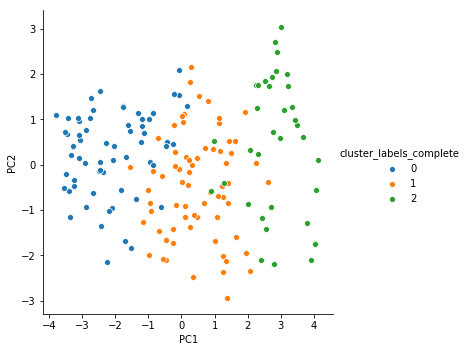

In [58]:
sns.pairplot(data=result, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_labels_complete", size=5)

Cluster 0 is the cluster below -1 on the x - axis, Cluster 1 is from -1 to 2 on the x - axis while Cluster 2 is the cluster above 2 on x - axis. As seen the two components clearly distinguish the 3 clusters.

In [59]:
result[result.cluster_labels_complete == 0].country.values

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Kazakhstan', 'Kenya', 'Kiribati', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mozambique', 'Myanmar', 'Nepal', 'Niger',
       'Nigeria', 'Pakistan', 'Philippines', 'Russia', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sri Lanka', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Uzbekistan',
       'Venezuela', 'Yemen', 'Zambia'], dtype=object)

 Cluster 0 is the cluster consisting of countries with dire need of aid.
 Countries which the CEO needs to focus on the most are:
    - Afghanistan    
    - Benin
    - Burkina Faso
    - Burundi
    - Central African Republic
    - Chad
    - Iraq
    - Yemen
    - Zambia, etc